In [2]:
# # DATA CLEANING & PREPROCESSING
# ✅ Mount Google Drive and Load Dataset
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# ✅ Update this path based on your actual folder location in Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/train.csv'

# Load the dataset
train_df = pd.read_csv(file_path)

# Preview
train_df.head()
# Check shape
print("Shape of train data:", train_df.shape)

# Preview first few rows
print(train_df.head())

# Data types & non-null counts
print(train_df.info())

# Basic statistics
print(train_df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of train data: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2

In [3]:
## check for missing value
missing_values = train_df.isnull().sum()
missing_percent = (missing_values / len(train_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
print(missing_df)


             Missing Values    Percent
PassengerId               0   0.000000
Survived                  0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
Age                     177  19.865320
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
Fare                      0   0.000000
Cabin                   687  77.104377
Embarked                  2   0.224467


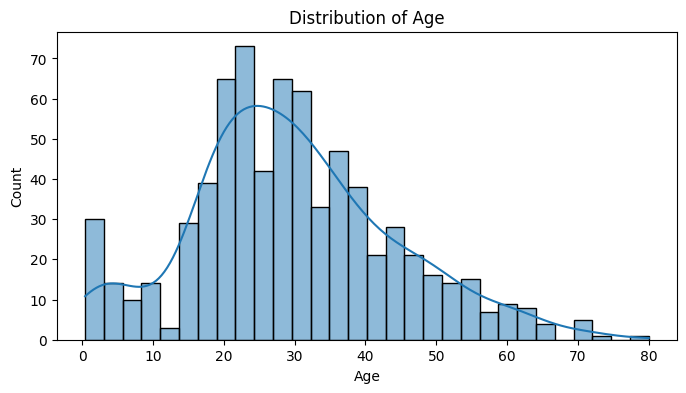

In [4]:
 ### Distribution of Numerical Variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()


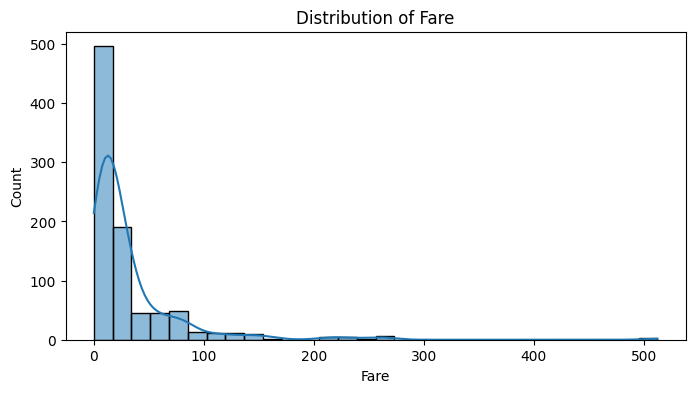

In [5]:
# Fare distribution:
plt.figure(figsize=(8,4))
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.show()

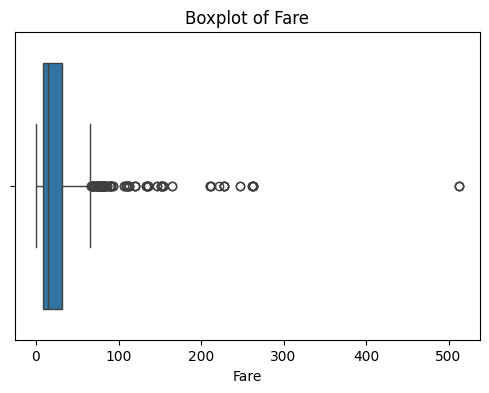

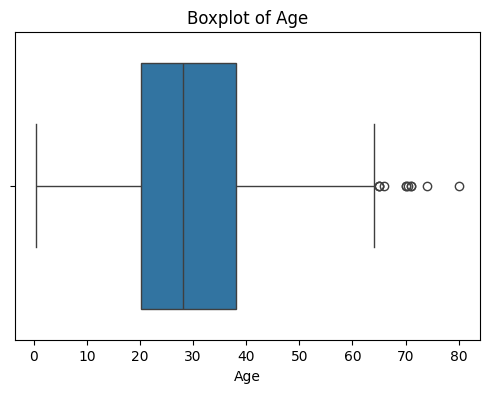

In [6]:
# Boxplots for outliers:
plt.figure(figsize=(6,4))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=train_df['Age'])
plt.title('Boxplot of Age')
plt.show()

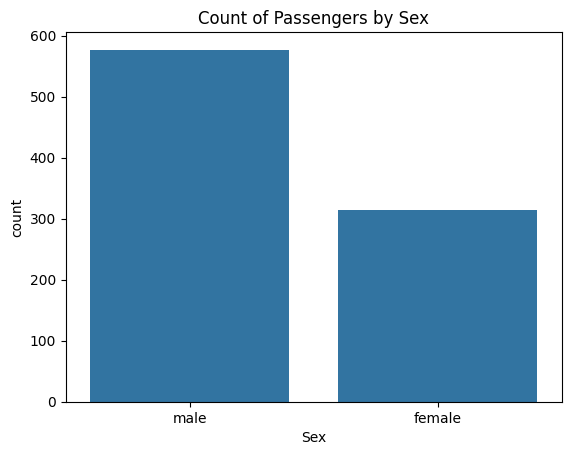

In [8]:
### Categorical Variable Distribution
sns.countplot(x='Sex', data=train_df)
plt.title('Count of Passengers by Sex')
plt.show()

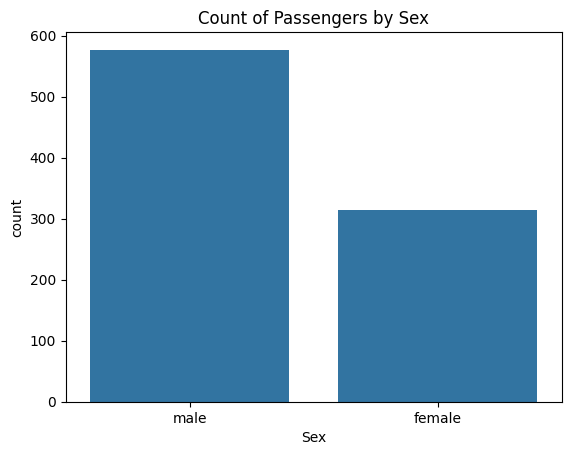

In [9]:
sns.countplot(x='Sex', data=train_df)
plt.title('Count of Passengers by Sex')
plt.show()


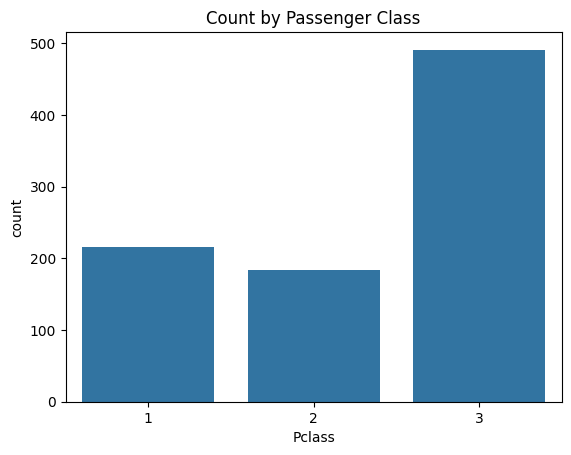

In [10]:
sns.countplot(x='Pclass', data=train_df)
plt.title('Count by Passenger Class')
plt.show()


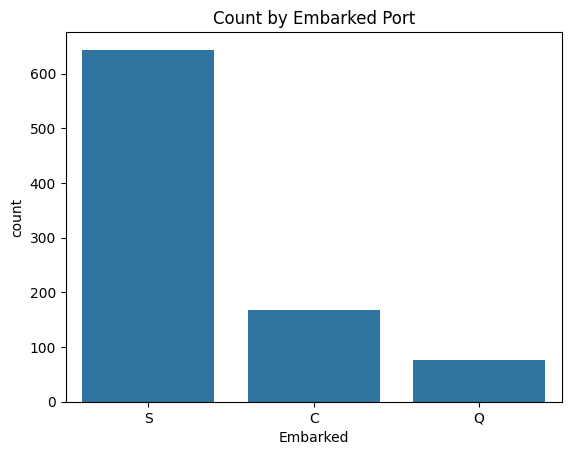

In [11]:
sns.countplot(x='Embarked', data=train_df)
plt.title('Count by Embarked Port')
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


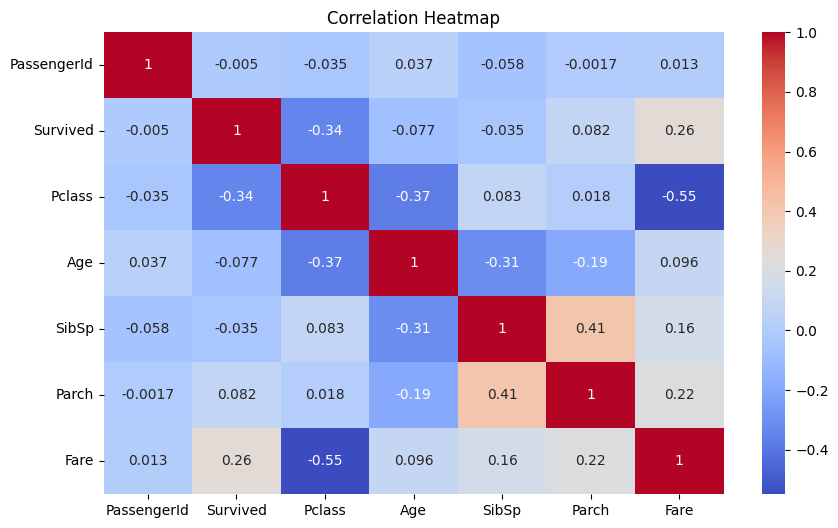

In [12]:
## corelation and relationship
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Check what we have
print(numeric_df.columns)

# Then plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


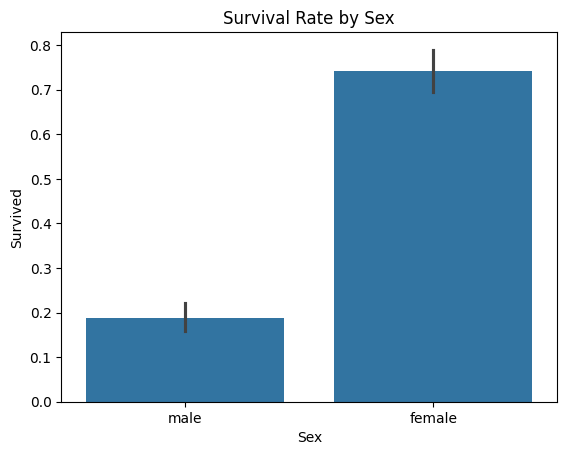

In [13]:
## Survival Analysis
print(train_df.groupby('Sex')['Survived'].mean())

sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()